In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from math import *

In [13]:
files = [file for file in os.listdir("./201719Data")]
all_years_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./201719Data/"+file)
    all_years_data = pd.concat([all_years_data, df])

all_years_data.to_csv("201719DC.csv", index=False)

In [2]:
all_data = pd.read_csv('201719DC.csv')

In [3]:
all_data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Unnamed: 0
0,679.0,2018-05-01 00:00:00,2018-05-01 00:11:19,31302.0,Wisconsin Ave & Newark St NW,31307.0,3000 Connecticut Ave NW / National Zoo,W22771,Member,NaN
1,578.0,2018-05-01 00:00:20,2018-05-01 00:09:59,31232.0,7th & F St NW / National Portrait Gallery,31609.0,Maine Ave & 7th St SW,W21320,Casual,NaN
2,580.0,2018-05-01 00:00:28,2018-05-01 00:10:09,31232.0,7th & F St NW / National Portrait Gallery,31609.0,Maine Ave & 7th St SW,W20863,Casual,NaN
3,606.0,2018-05-01 00:01:22,2018-05-01 00:11:29,31104.0,Adams Mill & Columbia Rd NW,31509.0,New Jersey Ave & R St NW,W00822,Member,NaN
4,582.0,2018-05-01 00:04:52,2018-05-01 00:14:34,31129.0,15th St & Pennsylvania Ave NW/Pershing Park,31118.0,3rd & Elm St NW,W21846,Member,NaN


In [5]:
del all_data['Start station number']
del all_data['End station number']
del all_data['Unnamed: 0']

In [6]:
all_data.head()

,Duration,Start date,End date,Start station,End station,Bike number,Member type
0,679.0,2018-05-01 00:00:00,2018-05-01 00:11:19,Wisconsin Ave & Newark St NW,3000 Connecticut Ave NW / National Zoo,W22771,Member
1,578.0,2018-05-01 00:00:20,2018-05-01 00:09:59,7th & F St NW / National Portrait Gallery,Maine Ave & 7th St SW,W21320,Casual
2,580.0,2018-05-01 00:00:28,2018-05-01 00:10:09,7th & F St NW / National Portrait Gallery,Maine Ave & 7th St SW,W20863,Casual
3,606.0,2018-05-01 00:01:22,2018-05-01 00:11:29,Adams Mill & Columbia Rd NW,New Jersey Ave & R St NW,W00822,Member
4,582.0,2018-05-01 00:04:52,2018-05-01 00:14:34,15th St & Pennsylvania Ave NW/Pershing Park,3rd & Elm St NW,W21846,Member


In [7]:
all_data['Start date'] = pd.to_datetime(all_data["Start date"])
all_data['End date'] = pd.to_datetime(all_data["End date"])
all_data['year'] = all_data["Start date"].dt.year
all_data['month'] = all_data["Start date"].dt.month

In [8]:
all_data.head()

,Duration,Start date,End date,Start station,End station,Bike number,Member type,year,month
0,679.0,2018-05-01 00:00:00,2018-05-01 00:11:19,Wisconsin Ave & Newark St NW,3000 Connecticut Ave NW / National Zoo,W22771,Member,2018,5
1,578.0,2018-05-01 00:00:20,2018-05-01 00:09:59,7th & F St NW / National Portrait Gallery,Maine Ave & 7th St SW,W21320,Casual,2018,5
2,580.0,2018-05-01 00:00:28,2018-05-01 00:10:09,7th & F St NW / National Portrait Gallery,Maine Ave & 7th St SW,W20863,Casual,2018,5
3,606.0,2018-05-01 00:01:22,2018-05-01 00:11:29,Adams Mill & Columbia Rd NW,New Jersey Ave & R St NW,W00822,Member,2018,5
4,582.0,2018-05-01 00:04:52,2018-05-01 00:14:34,15th St & Pennsylvania Ave NW/Pershing Park,3rd & Elm St NW,W21846,Member,2018,5


In [9]:
all_data['start_hour'] = all_data['Start date'].dt.hour
all_data['day_of_week'] = all_data['Start date'].dt.day_name()
all_data.head()

,Duration,Start date,End date,Start station,End station,Bike number,Member type,year,month,start_hour,day_of_week
0,679.0,2018-05-01 00:00:00,2018-05-01 00:11:19,Wisconsin Ave & Newark St NW,3000 Connecticut Ave NW / National Zoo,W22771,Member,2018,5,0,Tuesday
1,578.0,2018-05-01 00:00:20,2018-05-01 00:09:59,7th & F St NW / National Portrait Gallery,Maine Ave & 7th St SW,W21320,Casual,2018,5,0,Tuesday
2,580.0,2018-05-01 00:00:28,2018-05-01 00:10:09,7th & F St NW / National Portrait Gallery,Maine Ave & 7th St SW,W20863,Casual,2018,5,0,Tuesday
3,606.0,2018-05-01 00:01:22,2018-05-01 00:11:29,Adams Mill & Columbia Rd NW,New Jersey Ave & R St NW,W00822,Member,2018,5,0,Tuesday
4,582.0,2018-05-01 00:04:52,2018-05-01 00:14:34,15th St & Pennsylvania Ave NW/Pershing Park,3rd & Elm St NW,W21846,Member,2018,5,0,Tuesday


In [10]:
all_data['Duration'] = all_data['Duration']/60
all_data.head()

,Duration,Start date,End date,Start station,End station,Bike number,Member type,year,month,start_hour,day_of_week
0,11.316667,2018-05-01 00:00:00,2018-05-01 00:11:19,Wisconsin Ave & Newark St NW,3000 Connecticut Ave NW / National Zoo,W22771,Member,2018,5,0,Tuesday
1,9.633333,2018-05-01 00:00:20,2018-05-01 00:09:59,7th & F St NW / National Portrait Gallery,Maine Ave & 7th St SW,W21320,Casual,2018,5,0,Tuesday
2,9.666667,2018-05-01 00:00:28,2018-05-01 00:10:09,7th & F St NW / National Portrait Gallery,Maine Ave & 7th St SW,W20863,Casual,2018,5,0,Tuesday
3,10.100000,2018-05-01 00:01:22,2018-05-01 00:11:29,Adams Mill & Columbia Rd NW,New Jersey Ave & R St NW,W00822,Member,2018,5,0,Tuesday
4,9.700000,2018-05-01 00:04:52,2018-05-01 00:14:34,15th St & Pennsylvania Ave NW/Pershing Park,3rd & Elm St NW,W21846,Member,2018,5,0,Tuesday


In [12]:
all_data['Duration'].describe()

count    1.069888e+07
mean     1.872493e+01
std      3.627103e+01
min      1.000000e+00
25%      6.716667e+00
50%      1.160000e+01
75%      1.993333e+01
max      1.439900e+03
Name: Duration, dtype: float64

In [13]:
#Based on the pricing system I'd expect the majority of rides to be under 2 hours
#and no longer than 4 hours
no_outliers_data = all_data[all_data['Duration'] < 240]
no_outliers_data.head()

,Duration,Start date,End date,Start station,End station,Bike number,Member type,year,month,start_hour,day_of_week
0,11.316667,2018-05-01 00:00:00,2018-05-01 00:11:19,Wisconsin Ave & Newark St NW,3000 Connecticut Ave NW / National Zoo,W22771,Member,2018,5,0,Tuesday
1,9.633333,2018-05-01 00:00:20,2018-05-01 00:09:59,7th & F St NW / National Portrait Gallery,Maine Ave & 7th St SW,W21320,Casual,2018,5,0,Tuesday
2,9.666667,2018-05-01 00:00:28,2018-05-01 00:10:09,7th & F St NW / National Portrait Gallery,Maine Ave & 7th St SW,W20863,Casual,2018,5,0,Tuesday
3,10.100000,2018-05-01 00:01:22,2018-05-01 00:11:29,Adams Mill & Columbia Rd NW,New Jersey Ave & R St NW,W00822,Member,2018,5,0,Tuesday
4,9.700000,2018-05-01 00:04:52,2018-05-01 00:14:34,15th St & Pennsylvania Ave NW/Pershing Park,3rd & Elm St NW,W21846,Member,2018,5,0,Tuesday


In [14]:
no_outliers_data['Duration'].describe()

count    1.067253e+07
mean     1.750125e+01
std      2.143797e+01
min      1.000000e+00
25%      6.700000e+00
50%      1.156667e+01
75%      1.985000e+01
max      2.399833e+02
Name: Duration, dtype: float64

In [15]:
# Save cleaned data to a csv file to begin analysis
cleaned_data = no_outliers_data
cleaned_data.to_csv("201719DCCleaned.csv", index=False)

#### Start of Data Analysis

In [2]:
data = pd.read_csv("201719DCCleaned.csv")
data.head()

,Duration,Start date,End date,Start station,End station,Bike number,Member type,year,month,start_hour,day_of_week
0,11.316667,2018-05-01 00:00:00,2018-05-01 00:11:19,Wisconsin Ave & Newark St NW,3000 Connecticut Ave NW / National Zoo,W22771,Member,2018,5,0,Tuesday
1,9.633333,2018-05-01 00:00:20,2018-05-01 00:09:59,7th & F St NW / National Portrait Gallery,Maine Ave & 7th St SW,W21320,Casual,2018,5,0,Tuesday
2,9.666667,2018-05-01 00:00:28,2018-05-01 00:10:09,7th & F St NW / National Portrait Gallery,Maine Ave & 7th St SW,W20863,Casual,2018,5,0,Tuesday
3,10.100000,2018-05-01 00:01:22,2018-05-01 00:11:29,Adams Mill & Columbia Rd NW,New Jersey Ave & R St NW,W00822,Member,2018,5,0,Tuesday
4,9.700000,2018-05-01 00:04:52,2018-05-01 00:14:34,15th St & Pennsylvania Ave NW/Pershing Park,3rd & Elm St NW,W21846,Member,2018,5,0,Tuesday


In [3]:
# Create dataframes for each year
grouped = data.groupby(data['year'])
df1 = grouped.get_group(2017)
df2 = grouped.get_group(2018)
df3 = grouped.get_group(2019)

In [4]:
users = data['Member type'].value_counts().keys().to_list()
count = data['Member type'].value_counts().to_list()

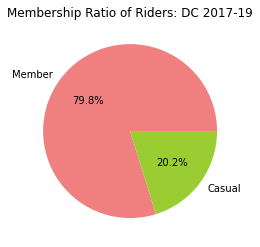

In [5]:
plt.pie(count, labels=users, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Membership Ratio of Riders: DC 2017-19")
plt.show()

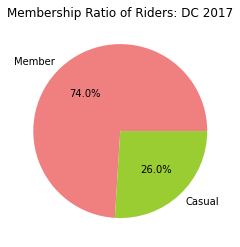

In [6]:
users_17 = df1['Member type'].value_counts().keys().to_list()
count_17 = df1['Member type'].value_counts().to_list()

plt.pie(count_17, labels=users_17, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Membership Ratio of Riders: DC 2017")
plt.show()

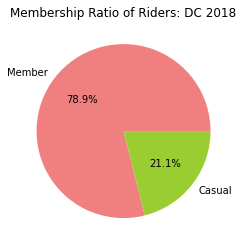

In [7]:
users_18 = df2['Member type'].value_counts().keys().to_list()
count_18 = df2['Member type'].value_counts().to_list()

plt.pie(count_18, labels=users_18, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Membership Ratio of Riders: DC 2018")
plt.show()

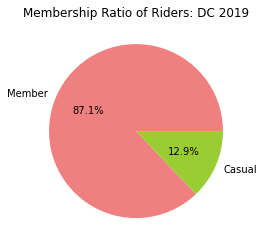

In [8]:
users_19 = df3['Member type'].value_counts().keys().to_list()
count_19 = df3['Member type'].value_counts().to_list()

plt.pie(count_19, labels=users_19, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Membership Ratio of Riders: DC 2019")
plt.show()

In [9]:
#track ridership per year
years = data['year'].value_counts().keys().to_list()
rides = data['year'].value_counts().to_list()

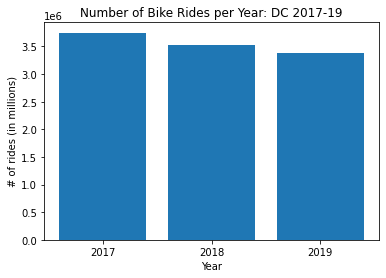

In [10]:
plt.bar(years, rides)
plt.xticks(years)
plt.xlabel("Year")
plt.ylabel("# of rides (in millions)")
plt.title("Number of Bike Rides per Year: DC 2017-19")
plt.show()

In [11]:
num_bikes_year =[]
num_bikes1 = len(df1['Bike number'].unique())
num_bikes_year.append(num_bikes1)

In [12]:
num_bikes2 = len(df2['Bike number'].unique())
num_bikes_year.append(num_bikes2)

In [13]:
num_bikes3 = len(df3['Bike number'].unique())
num_bikes_year.append(num_bikes3)

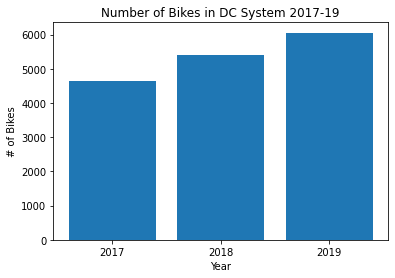

In [15]:
plt.bar([2017, 2018, 2019], num_bikes_year)
plt.xticks([2017, 2018, 2019])
plt.xlabel("Year")
plt.ylabel("# of Bikes")
plt.title("Number of Bikes in DC System 2017-19")
plt.show()

In [16]:
days = data['day_of_week'].value_counts().keys().to_list()
rides = data['day_of_week'].value_counts().to_list()

#Hardcoded the sorting into order of the week
days_sorted = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_sorted = [1474373,1570197,1617840,1587862,1574260,1513587,1334408]

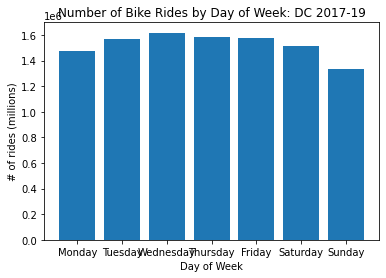

In [17]:
plt.bar(days_sorted, rides_sorted)
plt.xticks(days_sorted)
plt.xlabel("Day of Week")
plt.ylabel("# of rides (millions)")
plt.title("Number of Bike Rides by Day of Week: DC 2017-19")
plt.show()

In [18]:
#Make a data frame for weekdays and weekend
mask = data['day_of_week'].isin(['Saturday','Sunday'])
weekend_df=data[mask]
weekday_df=data[~mask]

In [19]:
weekend_hours = weekend_df['start_hour'].value_counts().keys().to_list()
weekend_count = weekend_df['start_hour'].value_counts().to_list()

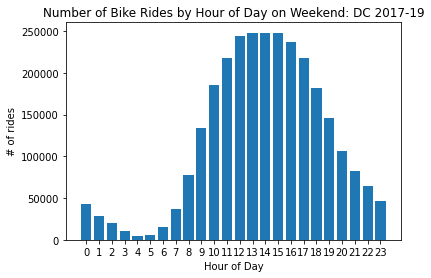

In [20]:
plt.bar(weekend_hours, weekend_count)
plt.xticks(weekend_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day on Weekend: DC 2017-19")
plt.show()

In [21]:
weekday_hours = weekday_df['start_hour'].value_counts().keys().to_list()
weekday_count = weekday_df['start_hour'].value_counts().to_list()

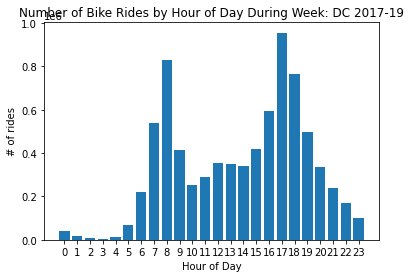

In [22]:
plt.bar(weekday_hours, weekday_count)
plt.xticks(weekday_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day During Week: DC 2017-19")
plt.show()

In [23]:
weekend_dict = dict(zip(weekend_hours, weekend_count))
weekend_keys = (list(weekend_dict.keys()))
weekend_keys.sort()

weekend_sorted={}
for e in weekend_keys:
    weekend_sorted[e]=weekend_dict[e]

weekend_keys = list(weekend_sorted.keys())
weekend_values = list(weekend_sorted.values())

In [24]:
weekday_dict = dict(zip(weekday_hours, weekday_count))
weekday_keys = (list(weekday_dict.keys()))
weekday_keys.sort()

weekday_sorted={}
for e in weekday_keys:
    weekday_sorted[e]=weekday_dict[e]

weekday_keys = list(weekday_sorted.keys())
weekday_values = list(weekday_sorted.values())

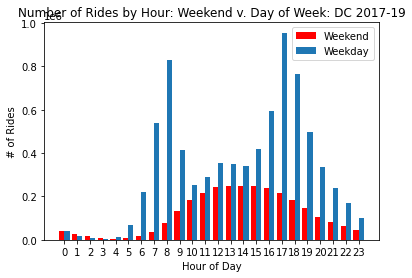

In [25]:
x = np.arange(len(weekend_keys))
ax = plt.subplot(111)
ax.bar(x-0.2, weekend_values, width=0.4, color='r', align='center', label='Weekend')
ax.bar(x+0.2, weekday_values, width=0.4, align='center', label='Weekday')
plt.xticks(weekend_keys)
plt.xlabel('Hour of Day')
plt.ylabel('# of Rides')
plt.title('Number of Rides by Hour: Weekend v. Day of Week: DC 2017-19')
plt.legend(loc = 'best')
plt.show()

In [26]:
#track rides by month over 3 year period
months = data['month'].value_counts().keys().to_list()
num_riders = data['month'].value_counts().to_list()

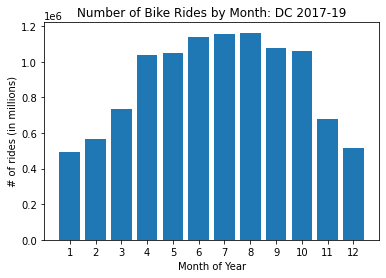

In [29]:
plt.bar(months, num_riders)
plt.xticks(months)
plt.xlabel("Month of Year")
plt.ylabel("# of rides (in millions)")
plt.title("Number of Bike Rides by Month: DC 2017-19")
plt.show()

In [30]:
#track most common and least common start stations over 3 year period
start_stations = data['Start station'].value_counts().keys().to_list()
num_start = data['Start station'].value_counts().to_list()

start_dict = dict(zip(start_stations, num_start))

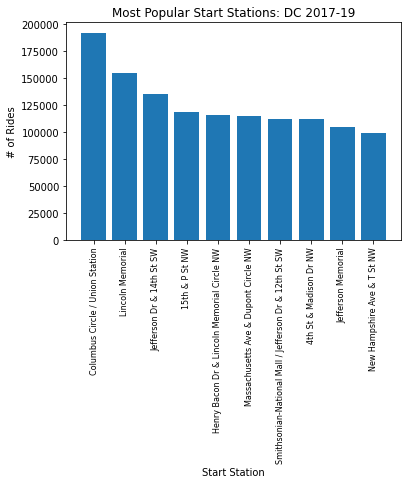

In [31]:
plt.bar(start_stations[0:10], num_start[0:10])
plt.xticks(start_stations[0:10], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Most Popular Start Stations: DC 2017-19")
plt.show()

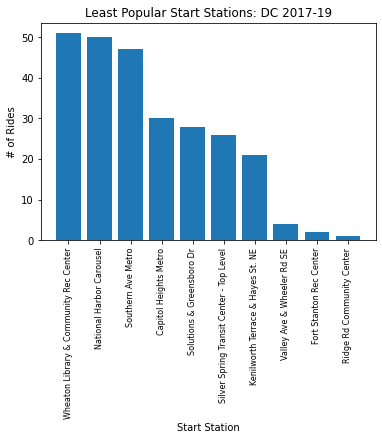

In [32]:
plt.bar(start_stations[-10:], num_start[-10:])
plt.xticks(start_stations[-10:], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Least Popular Start Stations: DC 2017-19")
plt.show()

In [33]:
#track most common and leas common end stations over 3 year period
end_stations = data['End station'].value_counts().keys().to_list()
num_end = data['End station'].value_counts().to_list()

end_dict = dict(zip(end_stations, num_end))

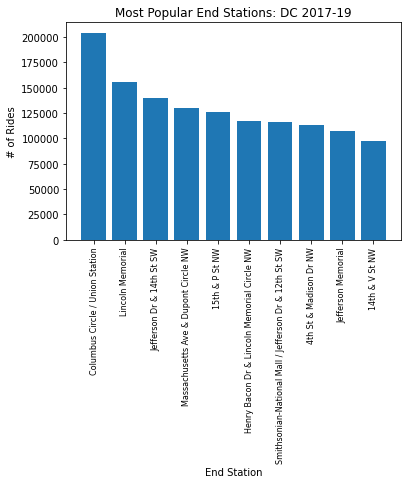

In [34]:
plt.bar(end_stations[0:10], num_end[0:10])
plt.xticks(end_stations[0:10], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Most Popular End Stations: DC 2017-19")
plt.show()

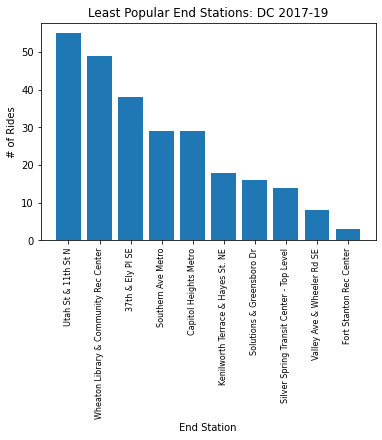

In [35]:
plt.bar(end_stations[-10:], num_end[-10:])
plt.xticks(end_stations[-10:], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Least Popular End Stations: DC 2017-19")
plt.show()

In [36]:
#combine start and end dicts and sort by value
def combine(d1, d2):
    new_dict=d1
    for key in d2:
        if key in new_dict:
            new_dict[key] += d2[key]
        else:
            new_dict[key]=d2[key]
    return new_dict

#Sort overall dict by value in increasing order to identify top and bottom stations
overall_dict = combine(start_dict, end_dict)
overall_dict={k: v for k, v in sorted(overall_dict.items(), key=lambda item: item[1])}


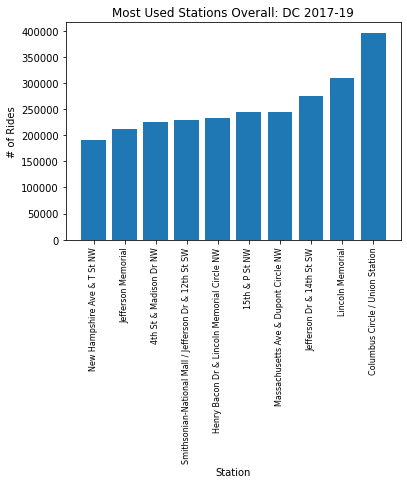

In [37]:
plt.bar((list(overall_dict.keys()))[-10:], (list(overall_dict.values()))[-10:])
plt.xticks((list(overall_dict.keys()))[-10:], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Most Used Stations Overall: DC 2017-19")
plt.show()


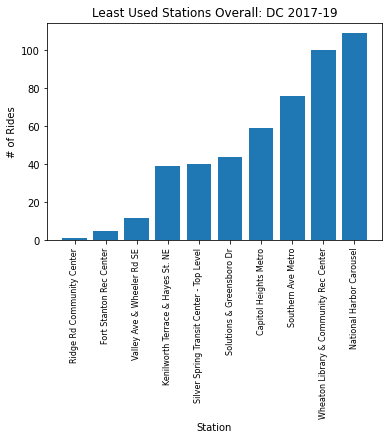

In [38]:
plt.bar((list(overall_dict.keys()))[0:10], (list(overall_dict.values()))[0:10])
plt.xticks((list(overall_dict.keys()))[0:10], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Least Used Stations Overall: DC 2017-19")
plt.show()

In [39]:
#How does the number of stations change?
num_stations=[]
stations_2017 = len(list(pd.concat([df1['Start station'], df1['End station']]).unique()))
num_stations.append(stations_2017)

In [40]:
stations_2018 = len(list(pd.concat([df2['Start station'], df2['End station']]).unique()))
num_stations.append(stations_2018)

In [41]:
stations_2019 = len(list(pd.concat([df3['Start station'], df3['End station']]).unique()))
num_stations.append(stations_2019)

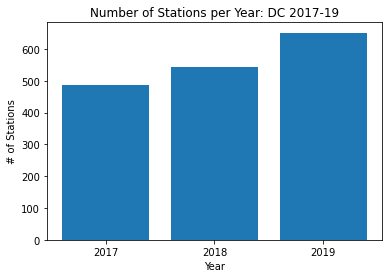

In [42]:
plt.bar([2017,2018,2019], num_stations)
plt.xticks([2017,2018,2019])
plt.xlabel("Year")
plt.ylabel("# of Stations")
plt.title("Number of Stations per Year: DC 2017-19")
plt.show()

In [43]:
#determine tripduration statistics (min, max, average, std, etc.)
data['Duration'].describe()

count    1.067253e+07
mean     1.750125e+01
std      2.143797e+01
min      1.000000e+00
25%      6.700000e+00
50%      1.156667e+01
75%      1.985000e+01
max      2.399833e+02
Name: Duration, dtype: float64

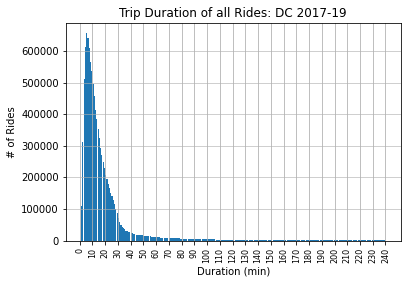

In [44]:
times = data['Duration']
times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of all Rides: DC 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

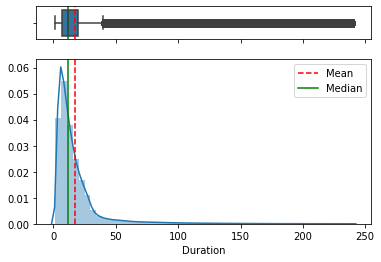

In [45]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=data['Duration'].mean()
median=data['Duration'].median()

sns.boxplot(data['Duration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(data['Duration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [48]:
#Subcriber v Customer Rides
grouped_user = data.groupby(data['Member type'])
df_sub = grouped_user.get_group('Member')
df_cust = grouped_user.get_group('Casual')

In [49]:
df_sub['Duration'].describe()

count    8.516552e+06
mean     1.279354e+01
std      1.254460e+01
min      1.000000e+00
25%      6.000000e+00
50%      9.883333e+00
75%      1.595000e+01
max      2.399833e+02
Name: Duration, dtype: float64

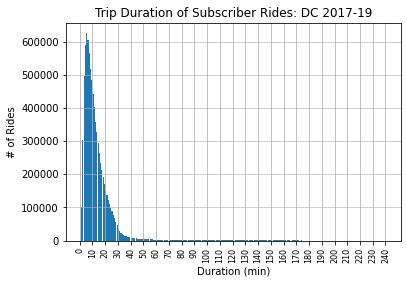

In [58]:
sub_times = df_sub['Duration']
sub_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Subscriber Rides: DC 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

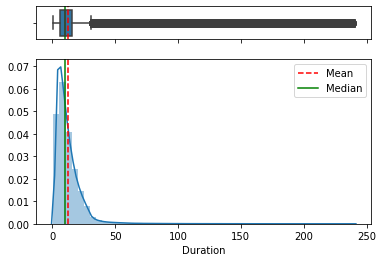

In [51]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_sub['Duration'].mean()
median=df_sub['Duration'].median()

sns.boxplot(df_sub['Duration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_sub['Duration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [52]:
df_cust['Duration'].describe()

count    2.155975e+06
mean     3.609768e+01
std      3.492913e+01
min      1.000000e+00
25%      1.491667e+01
50%      2.425000e+01
75%      4.246667e+01
max      2.399833e+02
Name: Duration, dtype: float64

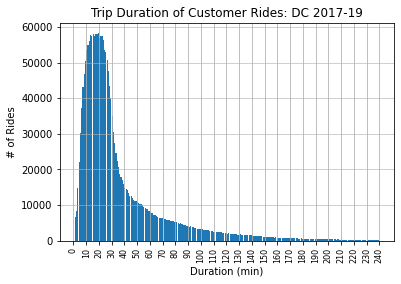

In [57]:
cust_times = df_cust['Duration']
cust_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Customer Rides: DC 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

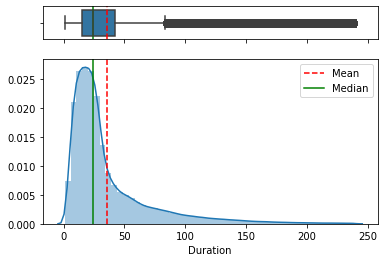

In [54]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_cust['Duration'].mean()
median=df_cust['Duration'].median()

sns.boxplot(df_cust['Duration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_cust['Duration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [55]:
weekend_df['Duration'].describe()

count    2.847995e+06
mean     2.266628e+01
std      2.706607e+01
min      1.000000e+00
25%      7.766667e+00
50%      1.433333e+01
75%      2.535000e+01
max      2.399833e+02
Name: Duration, dtype: float64

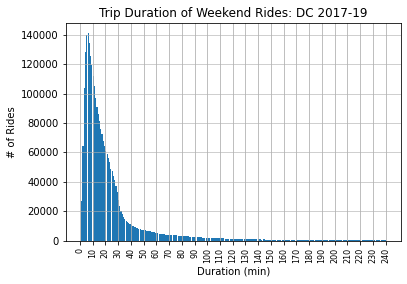

In [59]:
weekend_times = weekend_df['Duration']
weekend_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekend Rides: DC 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

In [56]:
weekday_df['Duration'].describe()

count    7.824532e+06
mean     1.562127e+01
std      1.862741e+01
min      1.000000e+00
25%      6.416667e+00
50%      1.085000e+01
75%      1.808333e+01
max      2.399833e+02
Name: Duration, dtype: float64

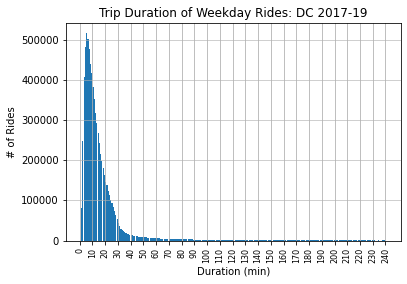

In [60]:
weekday_times = weekday_df['Duration']
weekday_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekday Rides: DC 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)